# Walmat Sales Analysis And Prediction
In this project, we will be analysing and making predictions collected from Walmat stores.
We will analyse the relationship between the weekly sales completed by 46 stores and with other factors that might have impacted the sales.

We will then use the collected data to build a regression model to predict future sales of the sales based on previous data.

In [34]:
# Import necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Data Pre-processing

In [3]:
# Read data into csv

df = pd.read_csv("walmart.csv")

## Accessing Data

In this section,  I will be accessing the dataset for any kind of quality and tidyness issues.

In [4]:
# Number of rows and columns of dataset.

df.shape

(6435, 8)

In [5]:
# Check dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# View first five rows.

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
# Descriptive summary of data.

df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Data Cleaning

### Quality issues
- Date has string data type instead of datetime.
- Rename column names to a more descriptive names.
- Convert column label to lowercase.


## Date in string data type instead of datetime.
#### Define
Convert Date to datetime

#### Code

In [8]:
# Convert Date to datetime

df["Date"] = pd.to_datetime(df["Date"])

#### Test

In [9]:
# Check dataset information.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Temperature in Farenheight instead of Celsius
#### Define
For convenient purpose, convert temperature from fahrenheit to celsius.
#### Code

In [10]:
# convert temperature from fahrenheit to celsius.

df["Temperature"] = (df["Temperature"] - 32) * (5/9)

#### Test

In [11]:
# confirm change.

df["Temperature"].describe()

count    6435.000000
mean       15.924324
std        10.247185
min       -18.922222
25%         8.588889
50%        17.038889
75%        23.855556
max        37.855556
Name: Temperature, dtype: float64

### Some column names inapproriate.

#### Define
Rename column names to more descriptive names.
Convert column labels to lower case


#### Code

In [12]:
# Rename column names to more descriptive names. 

df.rename({"Weekly_Sales": "sales", 
           "Holiday_Flag": "is_holiday",
           "Unemployment":"unemployment_rate"}, 
          axis=1, inplace=True)

# Convert column labels to lower case
df.columns  = df.columns.str.lower()

#### Test

In [13]:
# Confirm change.

df.head(2)

,store,date,sales,is_holiday,temperature,fuel_price,cpi,unemployment_rate
0,1,2010-05-02,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.616667,2.548,211.242170,8.106


## Data Exploration
Now  that we are done with data cleaning, We will start exploring the data.
We will first perform univairate data exploration where we will explore to get insight on a single variable. 
Then, we will move to bivairate explorate where will explore the relationship between two variables. Lastly, we will perform multivairate exploration where we will explore the relationship between three or more variables.

In [14]:
# First view the dataset variables.
df.head()

,store,date,sales,is_holiday,temperature,fuel_price,cpi,unemployment_rate
0,1,2010-05-02,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.055556,2.625,211.350143,8.106


# Univairate Exploration
In this section, we will explore the univariate distribution of data. We will start by exploring the numerical variables. Then, we will explore the categorical variables.

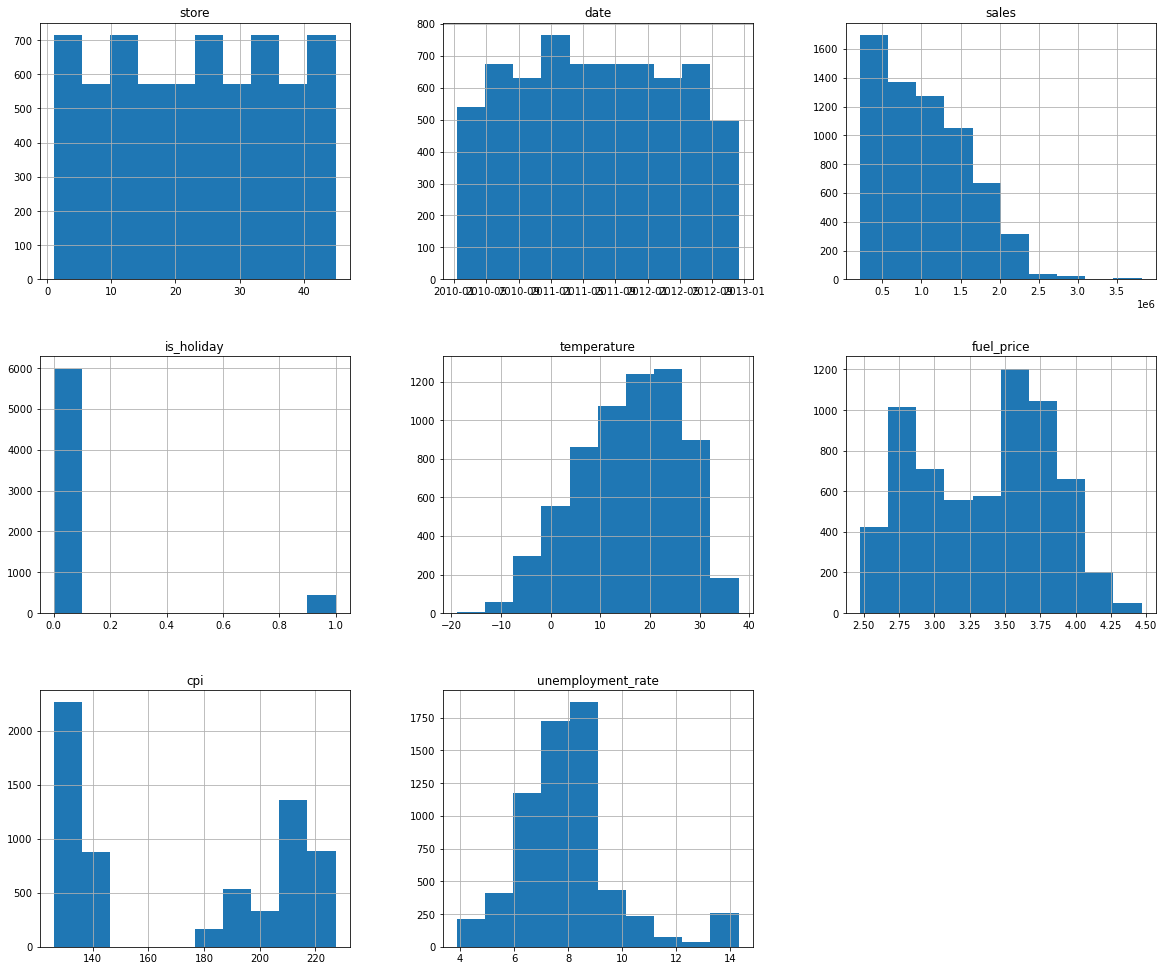

In [15]:
# Histogran distribution of data.

df.hist(figsize=(20, 17), bins=10);

### Observation:
We can ignore the sales and date distribution as they should be categorical data.

Sales: The distribution of sales is skewed to the right. This implies that there are little number of very expensive products. products as high 3.7  million dollar.

is_holiday: The is_holiday distribution shows that there is only few percentage of the sales were made during holiday.

Temperature: The distribution is slightly skewed to the left. It implies the temperature were extremely low only a few times during sales period. However, the temperature were mostly around 5 and 25 degree during the period of sales. There are days with temperature as high as 37 degree celsius. And there are sales that were made on days with terribly low temperatures. As low as -18 degree. That number seems infeasible. But, after a couple of google research, I found that one of the coldest temperature in history was recorded in 2011.

Fuel Price: The distribution of the price of fuel appears to be symmetrical and bimodal at the same time but still it is not, as there are higher price at the right of the distribution than the left. The distribution also appears to be slightly skewed to the right. Overall, the prices of fuel are not too far from themselves. They are close. The price of fuel is betwen 2.4 and 4.4 dollar.

CPI index: The cpi index appears to have two cluters of distribution.

Unemployment rate: The distribution of unemployement rate appears to be a slightly normal distribution with most of the rates between 6 and 9 percent.


We can now move on to exploring categorical data.

In [16]:
# Check first five rows.
df.head()

,store,date,sales,is_holiday,temperature,fuel_price,cpi,unemployment_rate
0,1,2010-05-02,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.055556,2.625,211.350143,8.106


In [17]:
# Color of bar charts.
base_color = sns.color_palette()[0]
base_color

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

<AxesSubplot:xlabel='is_holiday', ylabel='count'>

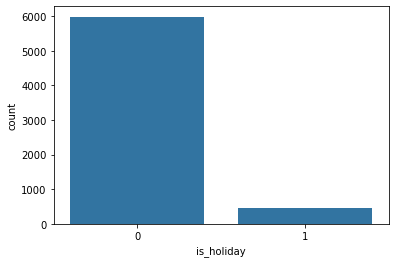

In [18]:
# Bar chart showing the number of holidays.

sns.countplot(
    data = df,
    x= "is_holiday",
    color=base_color

)


#### Observation:
Most of the sales were made during non holidays. Only a few percentage of sales were made during holidays.

<AxesSubplot:xlabel='count', ylabel='date'>

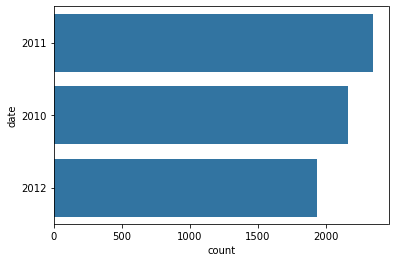

In [19]:
# Number of sales per year.

order_date = df["date"].dt.year.value_counts().index
sns.countplot(
    data = df,
    y= df["date"].dt.year,
    order=order_date,
    color=base_color

)

#### Observation:
Most of the sales were made in 2011 while 2012 had the least sales.

<AxesSubplot:xlabel='count', ylabel='date'>

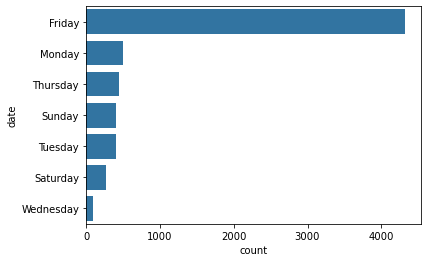

In [20]:
# The number of sales per day.

sales_day = df["date"].dt.day_name()
order_day = df["date"].dt.day_name().value_counts().index
sns.countplot(
    data = df,
    y= df["date"].dt.day_name(),
    order=order_day,
    color=base_color

)

### Observation
The sales are majorly made on Fridays while the least sales were made on Wednesdays.

<AxesSubplot:>

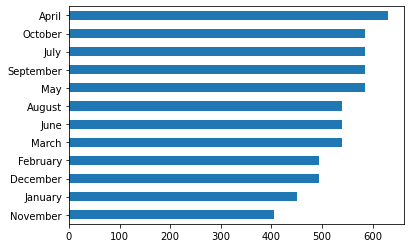

In [22]:
# Number of sales per month.

df["date"].dt.month_name().value_counts(ascending=True).plot(kind="barh")

#### Observation:
Most of the sales were made in the month of April while the least sales were made in November.

# Bivairate Exploration
In this section, we explore the relationship between two variables to find insight, we start with the numerical variables and we will later explore categorical variables for insight.

In [23]:
# First show first five rows of data.

df.head()

,store,date,sales,is_holiday,temperature,fuel_price,cpi,unemployment_rate
0,1,2010-05-02,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.055556,2.625,211.350143,8.106


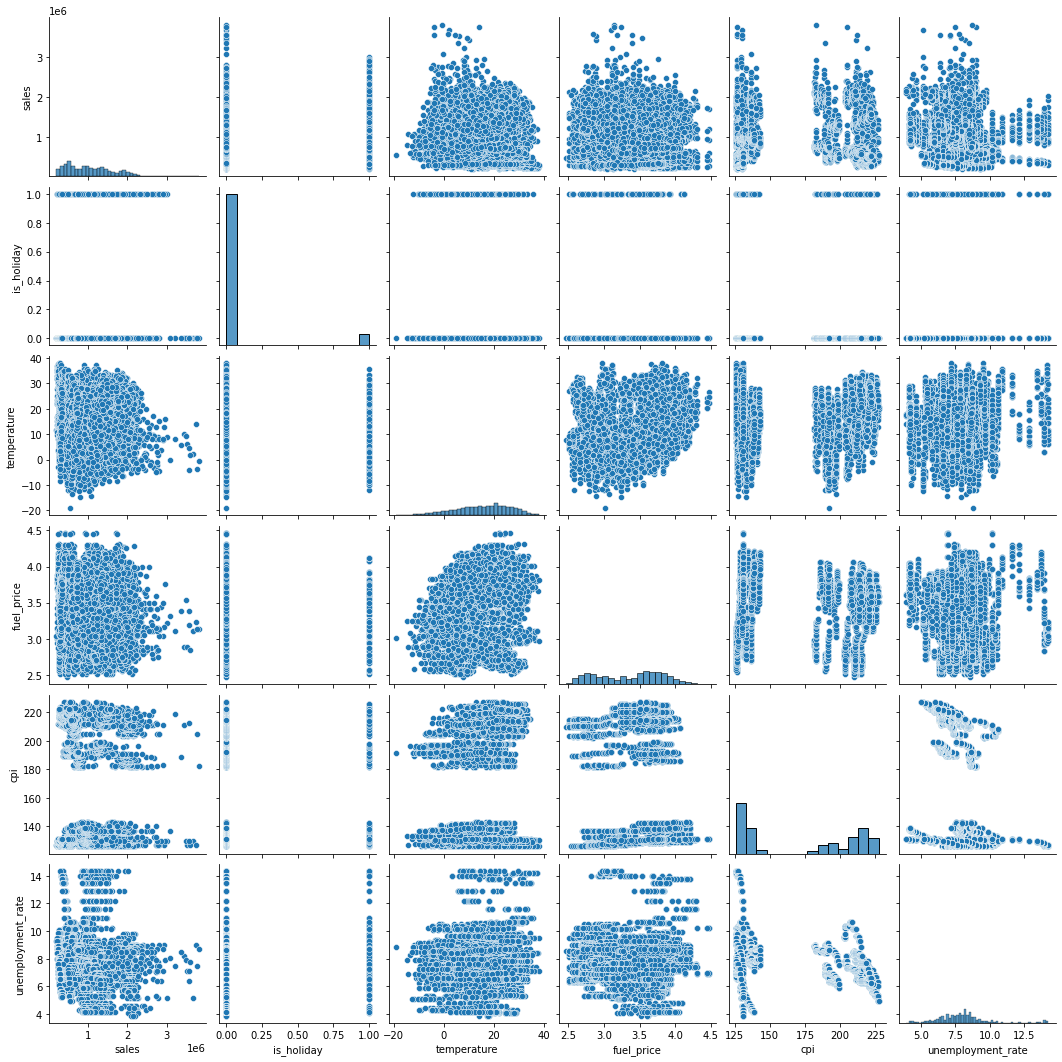

In [24]:
# Scatterplot of numerical variables.

sns.pairplot(data=df.drop(columns=["store"]))

#### Observation:
There appears to be a linear correlations between variables. Let,s take a look at their correlation matrix.

In [25]:
# Correlation of all the numerical variables with one another.

df.drop(columns=["store"]).corr()

,sales,is_holiday,temperature,fuel_price,cpi,unemployment_rate
sales,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176
is_holiday,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960
temperature,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158
fuel_price,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684
cpi,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020
unemployment_rate,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000


### Observation:
We can see that there is a linear correlation among the all the data. However, all the data are weakly correlated with one another. Let's plot the chart on a correlation matrix for visualisation.

<AxesSubplot:>

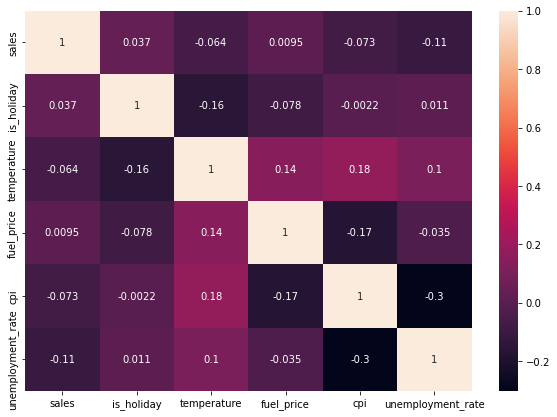

In [26]:
# Heatmap of numerical data.

plt.figure(figsize=(10,7))
sns.heatmap(
    data=df.drop(columns=["store"]).corr(),
    annot=True,
    
)

#### Observation:
It is obvious from the heatmap that all the data are weakly correlated with one another. Their correlation values close to 0 than they are to 1 or -1.
However, it is important to know that since none of their correlation values are equal to 0, they have a linear relationship. Hence, building a linear regression model with the data will be useful to make predictions.

Since sales will be our target vector, Let,s narrow down to see the correlation of other variables with sales.

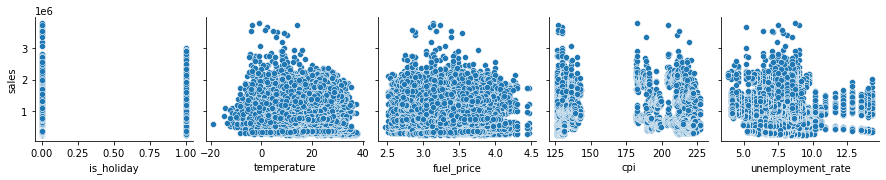

In [27]:
# Correlation of sales with other variables.

features = df.drop(columns=["store", "date", "sales"]).columns
sns.pairplot(data=df,
             y_vars=["sales"], 
             x_vars=features);

In [28]:
df.drop(columns=["store"]).corr()["sales"]

sales                1.000000
is_holiday           0.036891
temperature         -0.063810
fuel_price           0.009464
cpi                 -0.072634
unemployment_rate   -0.106176
Name: sales, dtype: float64

#### Observation:
There is some sort of linear relationship with sales. We will build a linear regresion model to make prediction later in this project.

<AxesSubplot:xlabel='is_holiday', ylabel='sales'>

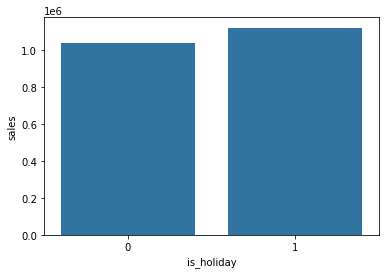

In [29]:
# Average sales during holiday and non-holiday periods.

sns.barplot(
        data=df,
        x="is_holiday",
        y="sales",
        ci=False,
        color=base_color,

    )


#### Observation:
We can see that from  the bar chart that more sales were made during holiday period. Although, not a big difference from non-holiday periods.

In [30]:
df.head()

,store,date,sales,is_holiday,temperature,fuel_price,cpi,unemployment_rate
0,1,2010-05-02,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.055556,2.625,211.350143,8.106


# Multivairate Analysis
In this section, we will explore the relationship between three variables to find insight.

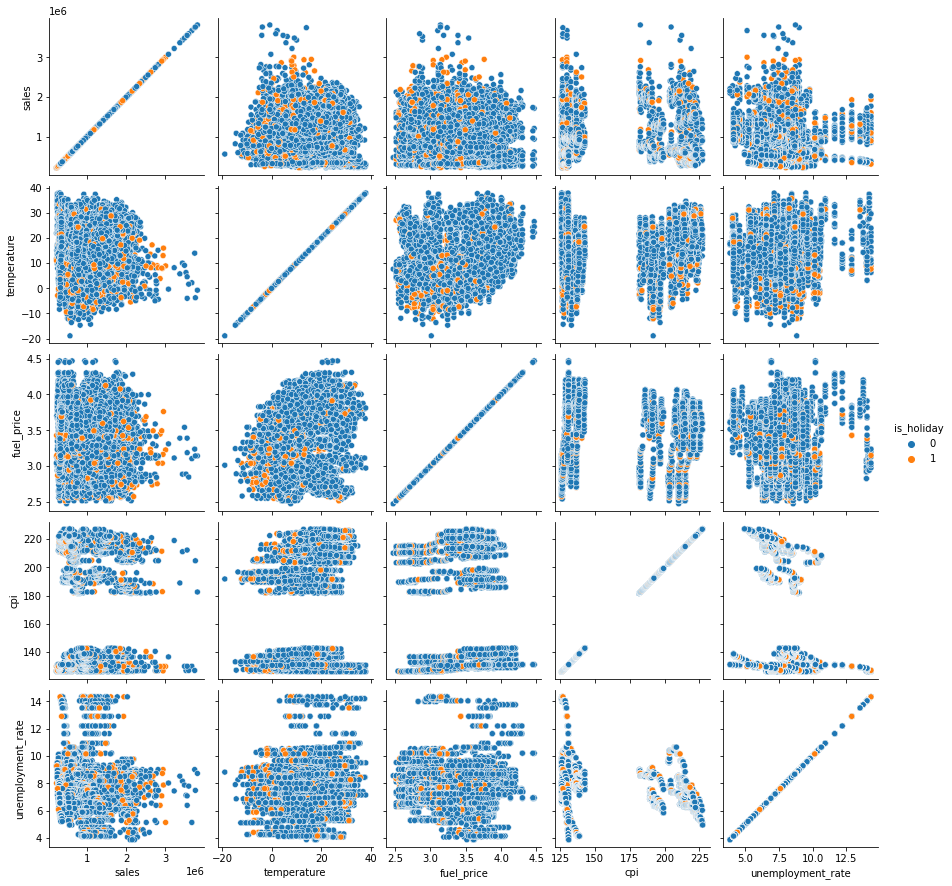

In [31]:
# Scatterplot showing the relationship between three variables.
sns.pairplot(
    data=df.drop(columns=["date", "store"]), 
    hue="is_holiday",
    diag_kind= None,
    
    
)

#### Observation:
We can see from the above scatterplot that there are only few number of holidays in the dataset compared to non-holiday periods. That confirm our analysis in the univariate analysis section that Most of the transaction days are non-holiday periods. That makes sense because in real life, holidays only occur on rear occasion.

In [32]:
df.head()

,store,date,sales,is_holiday,temperature,fuel_price,cpi,unemployment_rate
0,1,2010-05-02,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.055556,2.625,211.350143,8.106


## Split
In this section, we are going to split the data into feature matrix and target vector that will be used for building our model.


In [35]:
# Split the data into feature matrix and target vector
features = df.drop(columns=["store", "date", "sales"]).columns
target = "sales"
X = df[features]
y= df[target]

In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
# Split data into Train and test set.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Baseline
Determine a baseline that will be used to evaluate our model prediction

In [38]:
# averge sales as baseline

y_mean = [y_train.mean()]
baseline = y_mean * len(y_train)
baseline[:5]

[1044996.4142812742,
 1044996.4142812742,
 1044996.4142812742,
 1044996.4142812742,
 1044996.4142812742]

In [39]:
# Baseline mean absolute error for model evaluation
y_pred_baseline = mean_absolute_error(y_train, baseline)
y_pred_baseline

467253.0483889157

## Build Model
Build a model linear regression model to make predictions.

In [40]:
# Instantiate a linear regresion model.

lr = LinearRegression()

In [41]:
# Build model
lr.fit(X_train, y_train)

LinearRegression()

## Predict
Make prediction with both the training and test set with the built model.

In [42]:
# Make prediction with the traning data
y_pred_training = lr.predict(X_train)
y_pred_training[:5]

array([1049801.96399265,  989281.13525422, 1073503.31077658,
       1090498.08201019, 1076313.11014024])

In [43]:
y_pred_test = lr.predict(X_test)
y_pred_test[:5]

array([1072158.14235629, 1073252.0553452 ,  985315.20830992,
       1120597.34838361,  965247.20201297])

## Evaluate
Evaluate the model.

In [44]:
mean_absolute_error(y_train, y_pred_training)

465285.11319759313

In [45]:
mean_absolute_error(y_test, y_pred_test)

475432.5329588252

### Observation:
We can see that the mean abolute error of our training data slighly beat the baseline. But it failed with the test data.
This might be due to overfitting which can be caused by multicollinearity, we will use a regression algorithm that can penalise coeffiecient of the variables and withstand multicollinearity. Example of such algorithm is ridge and lasso regression

In [46]:
#Parameter

params =  {"alpha": range(1, 50, 2)}

# Instantiate ridge and regression
ridge = Ridge()
lasso =Lasso()
estimator = [ridge, lasso]
estimator

[Ridge(), Lasso()]

In [47]:
 # Hyperparameter tuning
    
ridge_reg, lasso_reg = [
    GridSearchCV(
        estimator=est,
        param_grid=params,
        cv=5, 
        verbose=4,
        n_jobs=-1,
        scoring="neg_mean_absolute_error"

    )
    for est in estimator

]
    
ridge_reg, lasso_reg

(GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
              param_grid={'alpha': range(1, 50, 2)},
              scoring='neg_mean_absolute_error', verbose=4),
 GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
              param_grid={'alpha': range(1, 50, 2)},
              scoring='neg_mean_absolute_error', verbose=4))

In [48]:
# Build Model with the best estimator.

ridge_reg.fit(X,y)
lasso_reg.fit(X,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': range(1, 50, 2)},
             scoring='neg_mean_absolute_error', verbose=4)

In [49]:
# Best alpha values for both model
ridge_reg.best_estimator_, lasso_reg.best_estimator_

(Ridge(alpha=49), Lasso(alpha=49))

In [50]:
# Make predictions from the training data with the two models
y_train_pred_r = ridge_reg.predict(X_train)
y_train_pred_l = lasso_reg.predict(X_train)

In [51]:
# Make predictions from the test data with the two models

y_test_pred_r = ridge_reg.predict(X_test)
y_test_pred_l = lasso_reg.predict(X_test)

In [52]:
# Mean absolute error of the training data predictions.

mean_absolute_error(y_train, y_train_pred_r), mean_absolute_error(y_train, y_train_pred_l)

(465532.5998653468, 465547.64323155436)

In [53]:
# Mean absolute error of the test data predictions.

mean_absolute_error(y_test, y_test_pred_r), mean_absolute_error(y_test, y_test_pred_l)

(475206.25675240497, 475239.29638157086)

#### Observation:
After building a model with the best estimator of ridge and lasso model, we can see that the test data prediction is still yet to beat the baseline value of 467,000.
There is a problem. We will go ahead and use a non linear regression and see if the result will beat our baseline.

We will create a for loop that will build a model model with different degrees of polynomial features.
we will then find the mean absolute error of each of the model and take the degree of the model that beat the baseline.

In [54]:
# mean absolute error of the test data on polynomial regression with degrees from 1 to 11.

result = pd.DataFrame()
for i in np.arange(1, 12):
    model_poly = make_pipeline(PolynomialFeatures(degree=i), LinearRegression())
    model_poly.fit(X_train,y_train)
    c= model_poly.predict(X_test)
    y_pred_baseline = mean_absolute_error(y_test, c)
    print(i, y_pred_baseline)
    

1 475432.53295882524
2 470297.39410256414
3 458569.9706216006
4 442667.4944755246
5 435342.02382390806
6 441536.1270486112
7 642652.1325330224
8 19370646724.844425
9 8350128665705.916
10 316797094.8311673
11 1465636262798.4001


### Observation:
From the above for loop, we see that the least absolute error was from a model built with a polynomial degree of 6.
This mean absolute error beats our baseline of 467,000. 
We will go ahead and build our final model with a degree of 5.

## Build Model

In [55]:
# Build a non-linear regression model with  a polynomial degree of 6.

model = make_pipeline(PolynomialFeatures(degree=6),
                      StandardScaler(),
                      LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

## Predict

In [56]:
# Predictions with training data.

y_train_pred_poly = model.predict(X_train)
y_train_pred_poly[:5]

array([ 543044.46012505,  832356.46012505, 1097572.46012505,
       1055908.46012505, 1039908.46012505])

In [57]:
# Predictions with test data.
y_test_pred_poly = model.predict(X_test)
y_test_pred_poly[:5]

array([ 975652.46012505, 1049956.46012505, 1011716.46012505,
       1271972.46012505,  838052.46012505])

## Evaluate

In [58]:
# Mean absolute error of the training data prediction.

mean_absolute_error(y_train, y_train_pred_poly)

404392.04056726064

In [59]:
# Mean absolute error of the test data prediction.

mean_absolute_error(y_test, y_test_pred_poly)

442417.64195270103

### Observation:
Finally, We built a model whose prediction beat the baseline. This implies that the model will be able to generalise. That is, it will be able to make predictions on data it has no access to.

## Communicate

In [65]:
# Coefficient of model.
model.named_steps["linearregression"].coef_[:5]

array([ 1.22218974e-08,  5.01576338e+17,  3.72763039e+15,  3.40076708e+16,
       -1.46010385e+15])

#### to be continued...